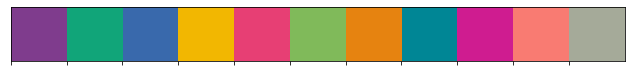

In [2]:
import os
import sys
import csv
import numpy as np
import pandas as pd
from glob import glob
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, f1_score, confusion_matrix, accuracy_score
# from sklearn.datasets import make_classification


import seaborn as sns
import plotly.io as pio
import plotly.express as px
import webcolors as wc
pio.templates.default = "plotly_white"


def transform_color_palette(colors):
    hex_colors = []
    
    for rgb_str in colors:
        rgb_tuple = tuple([int(x) for x in rgb_str.strip('rgb()').split(',')])
        hex_colors.append(wc.rgb_to_hex(rgb_tuple))

    return hex_colors


bold_colors = px.colors.qualitative.Bold

hex_bold = transform_color_palette(bold_colors)

my_bold_palette = sns.color_palette(hex_bold)
sns.set_palette(my_bold_palette)
sns.palplot(my_bold_palette)
# bold_colors
colors_2 = [bold_colors[4], bold_colors[2]]
# print(colors_2)
# bold_colors[2:4]

In [144]:
mpl_update = {
    'font.size': 16,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'figure.figsize': [12.0, 8.0],
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'lines.linewidth': 3,
    'legend.fontsize': 20,
    'legend.title_fontsize': 20,
#     'legend.frameon': True
}
plt.rcParams.update(mpl_update)

In [5]:
from scripts.etl import ETL
### Need to change import in prediction_functions.py and etl.py to scripts.*


In [162]:

def get_train_test_df(home):
    
    dummy_hub = 'RS4' if home != 'H6' else 'BS4'
    
    Data = ETL(H_num=home)
    Data.generate_dataset(hub=dummy_hub)
    
    train_data = Data.train[['occupied', 'day']]
    train_df = pd.DataFrame(train_data.groupby(by=['day'])['occupied'].mean())

    test_data = Data.test[['occupied', 'day']]
    test_df = pd.DataFrame(test_data.groupby(by=['day'])['occupied'].mean())

    train_df['Dataset'] = 'Train'
    test_df['Dataset'] = 'Test'

    df = pd.concat([train_df, test_df])
    
    return df



/Users/maggie/Documents/Github/LogisticRegression_HPDmobile/configuration_files/H1_etl_config.yml
1 etl configuration file(s) found for H1
Using: H1_etl_config.yml
Using hubs: ['RS4']
Creating new datasets for H1...
Train days: 18
Test days: 12


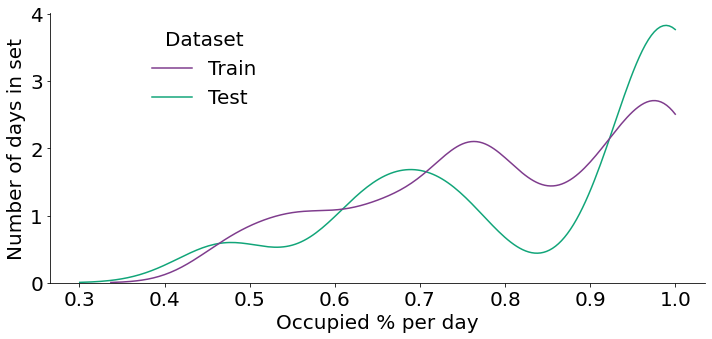

/Users/maggie/Documents/Github/LogisticRegression_HPDmobile/configuration_files/H2_etl_config.yml
1 etl configuration file(s) found for H2
Using: H2_etl_config.yml
Using hubs: ['RS4']
Creating new datasets for H2...
Train days: 10
Test days: 7


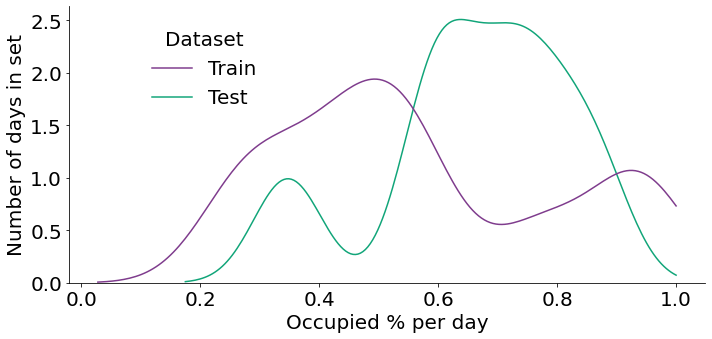

/Users/maggie/Documents/Github/LogisticRegression_HPDmobile/configuration_files/H3_etl_config.yml
1 etl configuration file(s) found for H3
Using: H3_etl_config.yml
Using hubs: ['RS4']
Creating new datasets for H3...
Train days: 21
Test days: 14


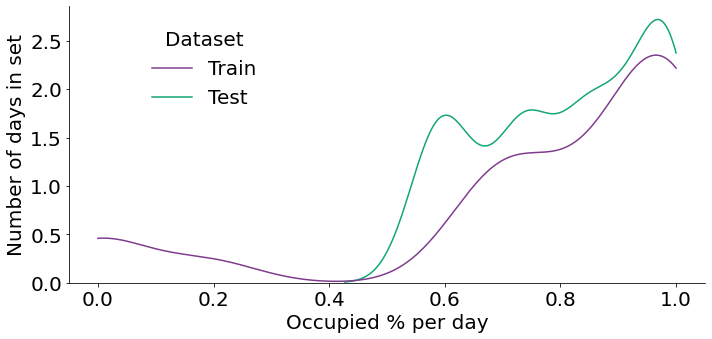

/Users/maggie/Documents/Github/LogisticRegression_HPDmobile/configuration_files/H4_etl_config.yml
1 etl configuration file(s) found for H4
Using: H4_etl_config.yml
Using hubs: ['RS4']
Creating new datasets for H4...
Train days: 10
Test days: 7


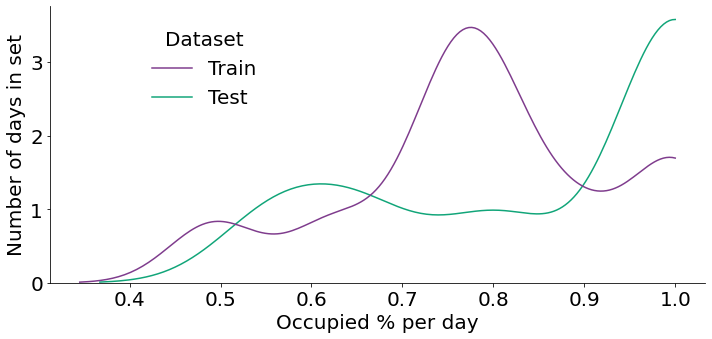

/Users/maggie/Documents/Github/LogisticRegression_HPDmobile/configuration_files/H5_etl_config.yml
1 etl configuration file(s) found for H5
Using: H5_etl_config.yml
Using hubs: ['RS4']
Creating new datasets for H5...
Train days: 9
Test days: 6


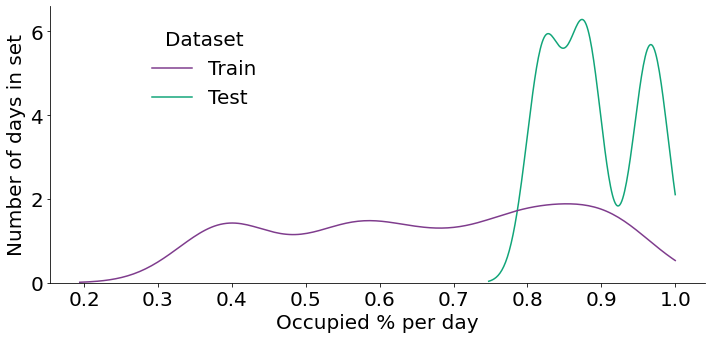

/Users/maggie/Documents/Github/LogisticRegression_HPDmobile/configuration_files/H6_etl_config.yml
1 etl configuration file(s) found for H6
Using: H6_etl_config.yml
Using hubs: ['BS4']
Creating new datasets for H6...
Train days: 22
Test days: 16


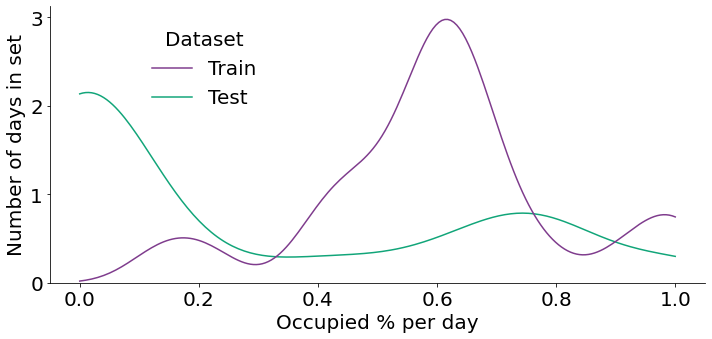

In [209]:
def plot_discrete_dist(df, home, title=''):
    
    g = sns.displot(df, x='occupied', hue='Dataset', kind='kde', fill=False, alpha=0.4, bw_adjust=0.5, height=5, aspect=1.7, clip=[0,1], common_norm=False, linewidth=1.5)
#     g = sns.displot(df, x='occupied', hue='Dataset', kind='hist', stat='frequency', bins=7, kde=True, fill=False, alpha=0.4, height=5, aspect=1.5, common_norm=False, linewidth=1)

    g.set_axis_labels('Occupied % per day', 'Number of days in set')
    g._legend.set_bbox_to_anchor((0.375, 0.75))

    plt.tight_layout()
#     plt.savefig(os.path.join(save_loc, f'{home}_perc.pdf'))



    plt.show()

    
for h in homes: 
    df = get_train_test_df(home=h)
    plot_discrete_dist(df=df, home=h)

In [130]:
save_loc = '/Users/maggie/Desktop/THESIS/Figures/occupancy_distributions/train_test'
os.makedirs(save_loc, exist_ok=True)

/Users/maggie/Documents/Github/LogisticRegression_HPDmobile/configuration_files/H1_etl_config.yml
1 etl configuration file(s) found for H1
Using: H1_etl_config.yml
Using hubs: ['RS4']
Creating new datasets for H1...
Train days: 18
Test days: 12


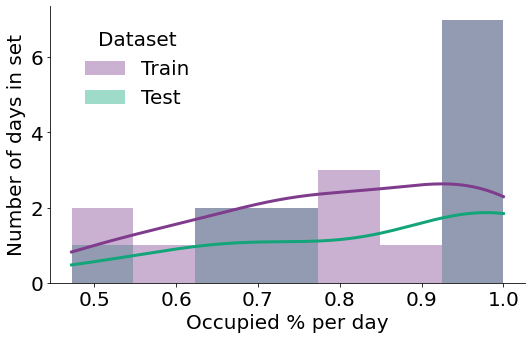

/Users/maggie/Documents/Github/LogisticRegression_HPDmobile/configuration_files/H2_etl_config.yml
1 etl configuration file(s) found for H2
Using: H2_etl_config.yml
Using hubs: ['RS4']
Creating new datasets for H2...
Train days: 10
Test days: 7


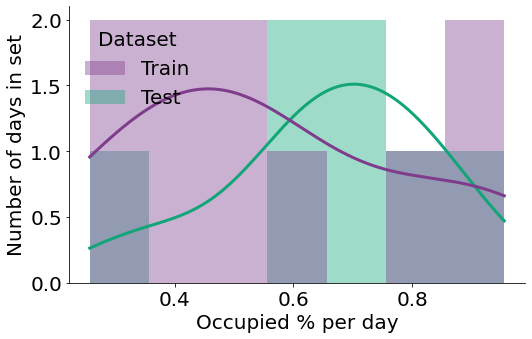

/Users/maggie/Documents/Github/LogisticRegression_HPDmobile/configuration_files/H3_etl_config.yml
1 etl configuration file(s) found for H3
Using: H3_etl_config.yml
Using hubs: ['RS4']
Creating new datasets for H3...
Train days: 21
Test days: 14


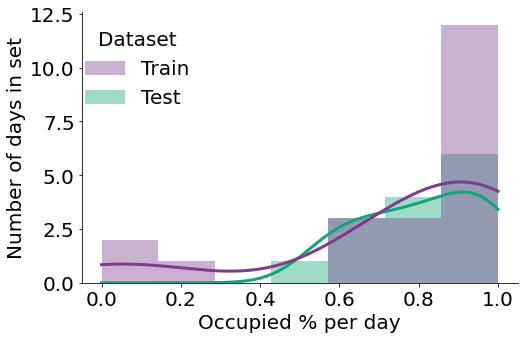

/Users/maggie/Documents/Github/LogisticRegression_HPDmobile/configuration_files/H4_etl_config.yml
1 etl configuration file(s) found for H4
Using: H4_etl_config.yml
Using hubs: ['RS4']
Creating new datasets for H4...
Train days: 10
Test days: 7


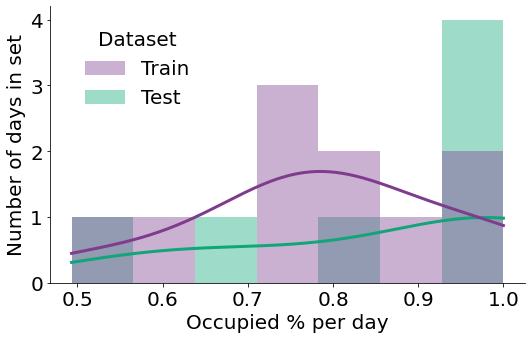

/Users/maggie/Documents/Github/LogisticRegression_HPDmobile/configuration_files/H5_etl_config.yml
1 etl configuration file(s) found for H5
Using: H5_etl_config.yml
Using hubs: ['RS4']
Creating new datasets for H5...
Train days: 9
Test days: 6


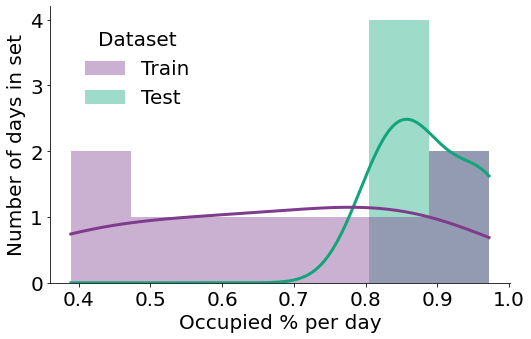

/Users/maggie/Documents/Github/LogisticRegression_HPDmobile/configuration_files/H6_etl_config.yml
1 etl configuration file(s) found for H6
Using: H6_etl_config.yml
Using hubs: ['BS4']
Creating new datasets for H6...
Train days: 22
Test days: 16


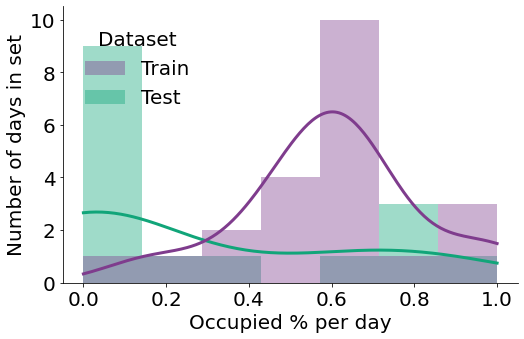

In [188]:
homes = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6']

for h in homes: 
    df = get_train_test_df(home=h)
    plot_discrete_dist(df=df, home=h)

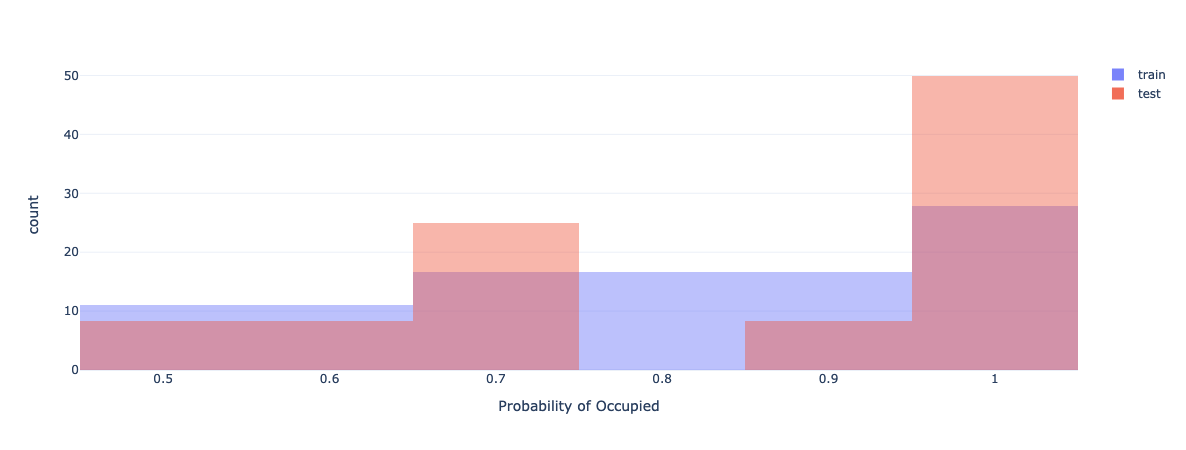

In [88]:
# def plot_occ_dist(df):

# #     df.actual = df.actual.replace({0:'Vacant', 1:'Occupied'})
# #     df = df.sort_values(by=['actual'])
# #     print(df)
# #     break


#     fig = px.histogram(
#         x=df.occupied, color=df.type, nbins=8,
# #         labels=dict(color='True Labels', x='Score'),
# #         color_discrete_sequence=bold_colors,
#         histnorm='percent',
#         width=1000, height=450,
#         labels=dict(x='Probability of Occupied', color=''),#, 0='Vacant', 1='Occupied'),
#         barmode='overlay'

#         )

#     fig.update_traces(opacity=0.85)
    
# #     fig.update_layout(
# #         title={
# #             'text':f'{hub}: Score Distribution',
# #             'y':0.95,
# #             'x':0.5,
# #             'xanchor': 'center',
# #             'yanchor': 'top',
# #             },
# #         yaxis_title='Count',
        
# #         font=dict(
# #             family='Arial',
# #             size=18,
# #             ),
        
# #         legend=dict(
# #             orientation="h",
# #             yanchor="bottom",
# #             y=0.9,
# #             xanchor="right",
# #             x=1,
# #             title_text=''
# #             )
# #         )
    
#     return fig

# plot_occ_dist(df)

In [ ]:
# save_test_loc = '/Users/maggie/Desktop/THESIS/Figures/Labeled_Images_ROC_distribution_etc'

# path = '/Users/maggie/Documents/Github/LogisticRegression_HPDmobile/raw_data_files/'
# homes = sorted(glob(os.path.join(path, 'H*', 'H*_occupancy.csv')))
# save_test_loc = '/Users/maggie/Desktop/THESIS/Figures/Labeled_Images_ROC_distribution_etc/occ_distributions'

# for H in homes[:1]:
#     df = pd.read_csv(H, use_cols=['timestamp', 'occupied'])
    